## Importing  Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv("../data/benin-malanville.csv")

In [3]:
# lets check if the dataset is loaded
print(f"The shape of dataset is {df.shape}")
print(f"This dataset has {df.shape[0]} rows (examples of data).")
print(f"This dataset has {df.shape[1]} columns (features of data).")


The shape of dataset is (525600, 19)
This dataset has 525600 rows (examples of data).
This dataset has 19 columns (features of data).


# 1) Summary Statistics & Missing-Value Report

In [4]:
# first five rows of tabular data
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# log the last examples of this dataset
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [6]:
# log random 5 exaples of the dataset
df.sample(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
516696,2022-08-02 19:37,-1.1,-0.2,-1.0,0.0,0.0,27.7,84.2,0.5,1.3,0.6,239.5,6.8,995,0,0.0,27.9,27.1,NaN
195502,2021-12-22 18:23,1.8,-0.8,0.4,8.6,7.6,28.9,20.4,2.7,3.4,0.4,21.3,7.5,996,0,0.0,27.9,27.7,NaN
510193,2022-07-29 07:14,81.8,43.2,74.3,68.4,68.5,23.8,92.9,2.7,3.6,0.6,249.2,12.8,996,0,0.0,25.8,24.3,NaN
111230,2021-10-25 05:51,-1.2,-0.3,-1.3,0.0,0.0,23.4,95.2,0.0,0.0,0.0,0.0,0.0,995,0,0.0,22.8,22.1,NaN
233970,2022-01-18 11:31,836.0,784.1,207.2,911.3,865.0,24.7,17.5,4.7,6.7,0.9,86.3,17.9,1002,0,0.0,46.2,34.9,NaN


In [7]:
# check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
# check if a null value exists
print("Check for missing values:")
df.isna().sum()

Check for missing values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# 1. Calculate the percentage of missing values for every column
null_percentages = df.isnull().sum() / len(df) * 100

# 2. Filter the resulting Series for percentages greater than 5
columns_with_high_nulls = null_percentages[null_percentages > 5]

# 3. Print the results
print("Columns with >5% Null Values:")
print(columns_with_high_nulls)

Columns with >5% Null Values:
Comments    100.0
dtype: float64


In [10]:
# Drop the column that contains virtually no data
df.drop(columns=['Comments'], inplace=True)

In [11]:
# check if null column dorped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [12]:
# Check if null rows exist
# 1. Define the critical columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Timestamp', 'Tamb','RH','WS','WSgust','WSstdev','WD','WDstdev','Cleaning','Precipitation','TModA','TModB']

# 2. Create a boolean mask:
missing_rows_mask = df[key_cols].isnull().any(axis=1)

# 3. Use the mask to display the subset of rows with missing data
missing_value_rows = df[missing_rows_mask]

# 4. Display the resulting DataFrame
print(f"Total rows with missing values in the key columns: {len(missing_value_rows)}")
print("Rows with Missing Data (only showing the key columns for focus):")
print(missing_value_rows[key_cols])

Total rows with missing values in the key columns: 0
Rows with Missing Data (only showing the key columns for focus):
Empty DataFrame
Columns: [GHI, DNI, DHI, ModA, ModB, Timestamp, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, Cleaning, Precipitation, TModA, TModB]
Index: []


In [13]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [14]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-08-09 00:01
freq                   1


In [15]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-08-09 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [16]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [17]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Timestamp': 525600}


## 2) Univariate Analysis

 Let's Apply Exploratory Data Analysis Technique

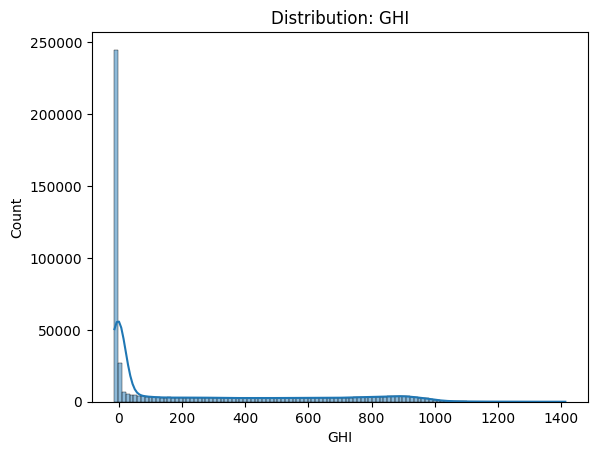

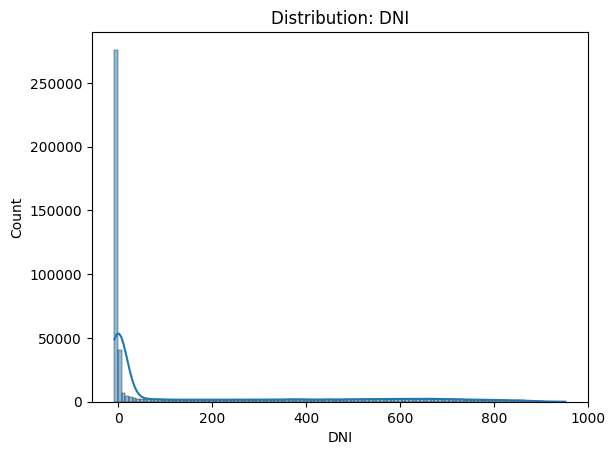

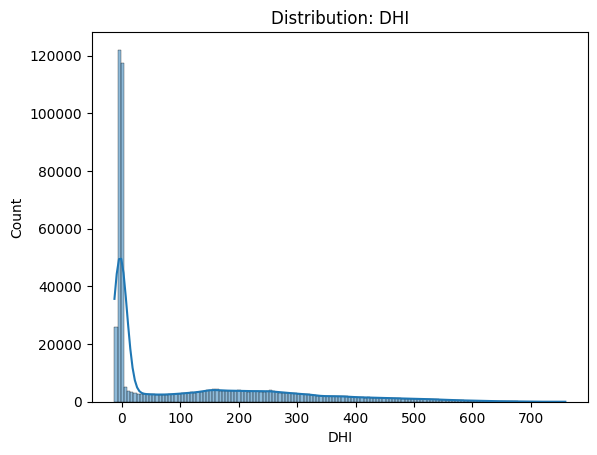

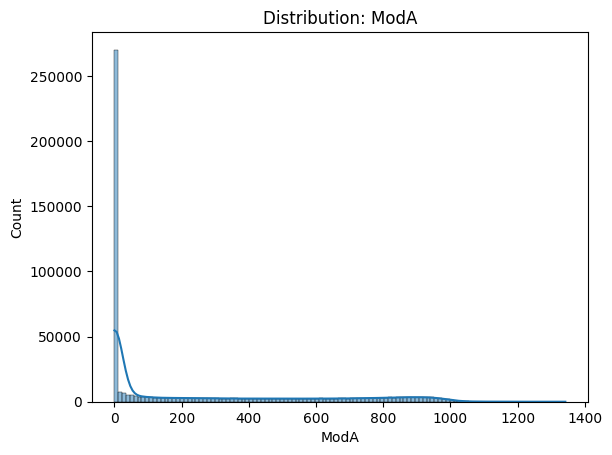

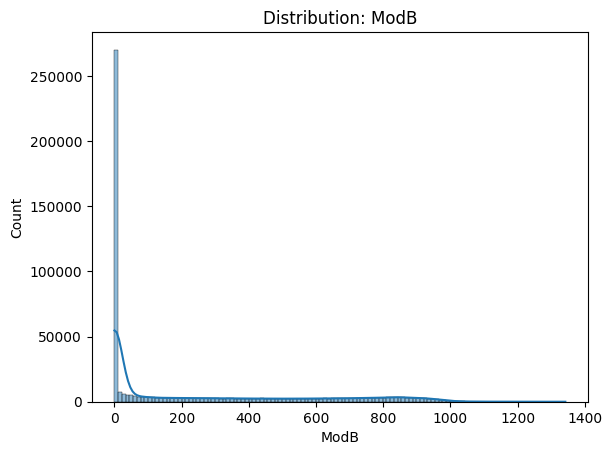

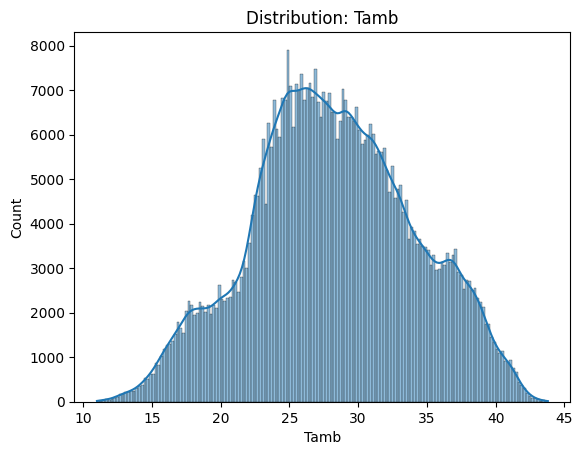

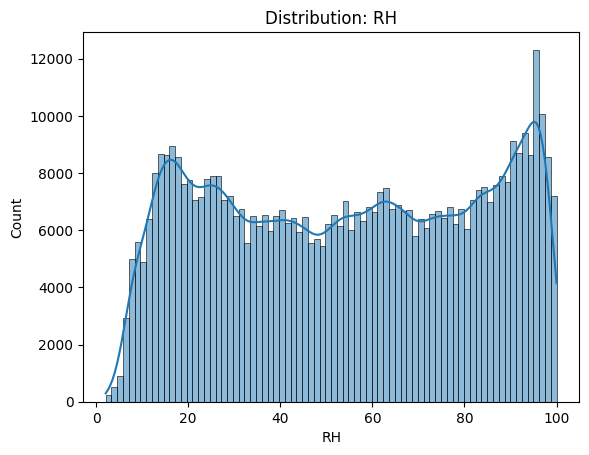

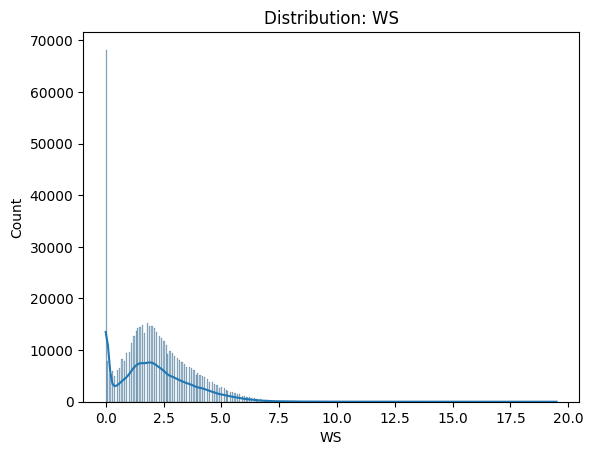

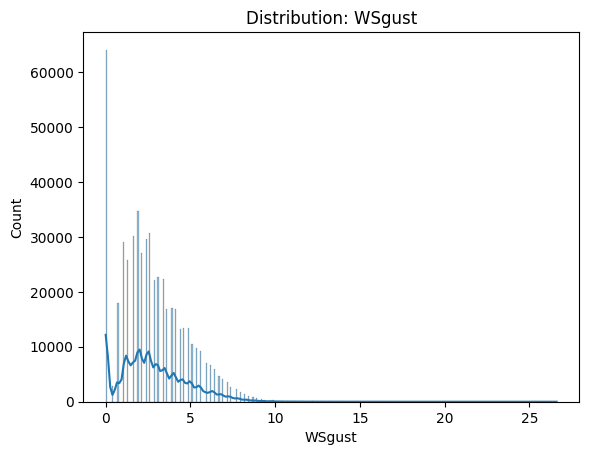

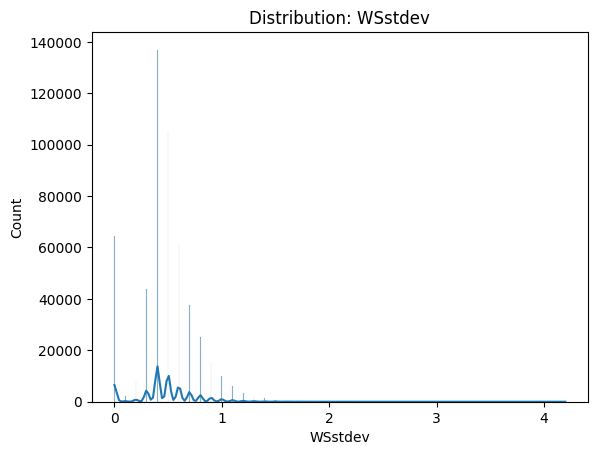

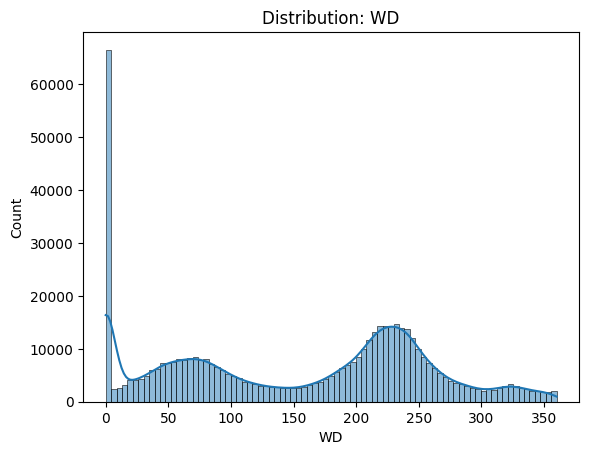

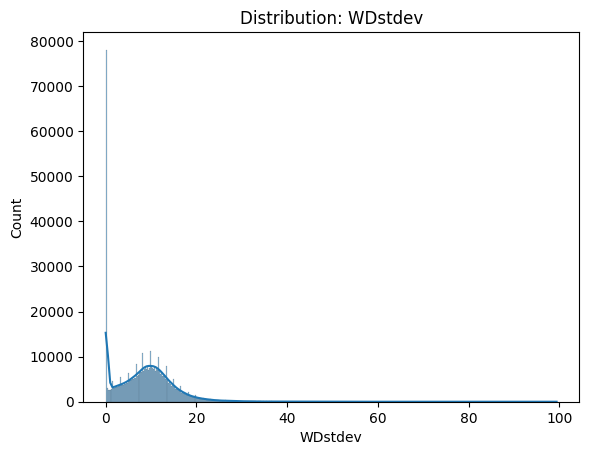

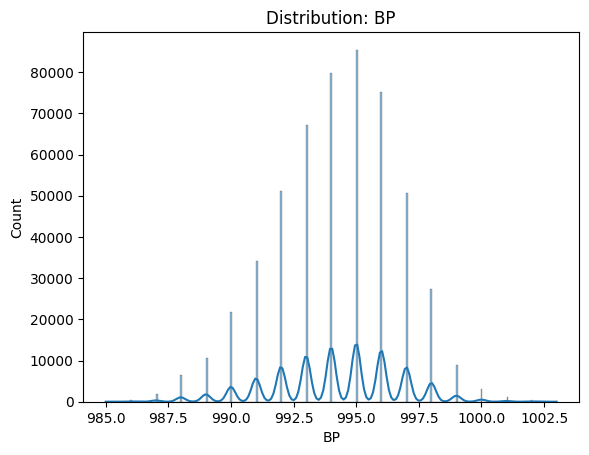

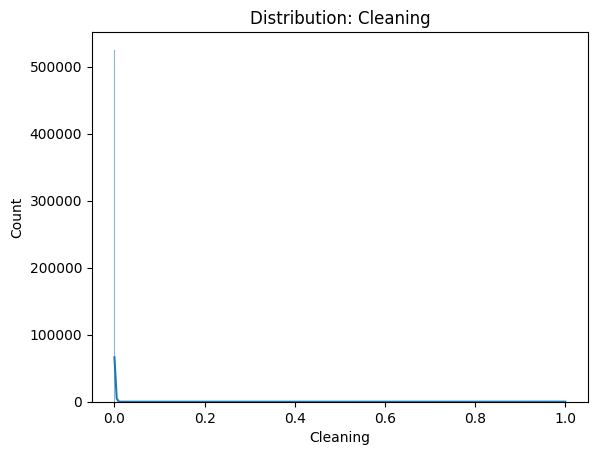

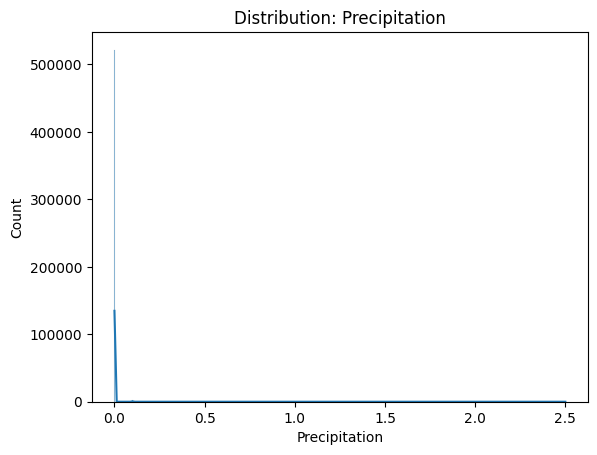

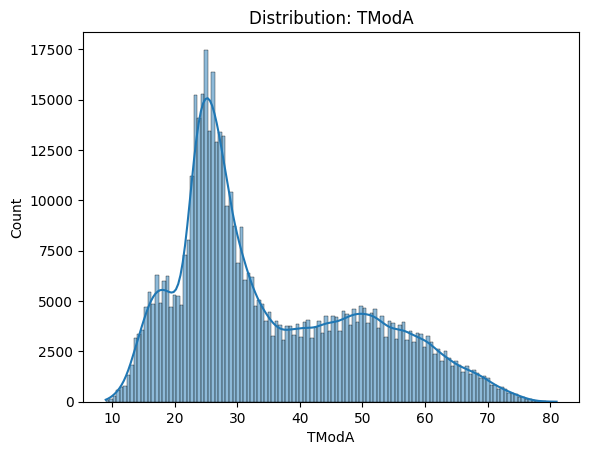

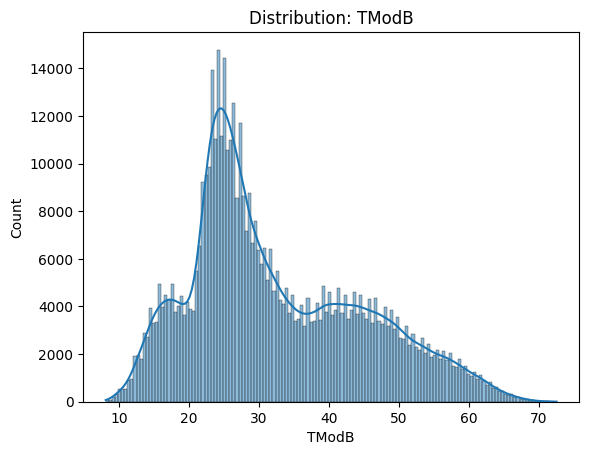

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


## Univariant Analysis - Intepretation

# Global horizontal irradiance Distribution and intepretation


Shape and Skewness

- The distribution of GHI is heavily right-skewed with most observations clustered at low values and a long tail extending to high values.

- The shape is dominated by the initial mode near zero, reflecting an exponential decay in frequency as $\text{GHI}$ increases.

Central Tendency (Mode and Median)

- The mode is near zero, which is expected as it accounts for all nighttime and heavily clouded periods.

- The mode at $\text{GHI} \approx 0$ is a physical necessity of time-series solar data, representing periods without sunlight.

---


# Direct Normal Irradiance Distribution and intepretation

Shape and Skewness

- The distribution of DNI is extremely similar to $\text{GHI}$, being heavily right-skewed with most observations clustered at low values.

- The shape is dominated by the initial mode near zero, reflecting an exponential decay in frequency as $\text{DNI}$ increases.

Central Tendency (Mode and Median)

- The mode is near zero, which is expected as it accounts for all periods when the sun is not visible (night) or when the sky is completely overcast.

- The mode at $\text{DNI} \approx 0$ is a physical necessity of time-series solar data, representing times when the direct beam component of solar energy is zero.

---

## Diffuse Horizontal Irradiance Distribution and intepretation
 Shape and Skewness

- The distribution of DHI is heavily right-skewed with most observations clustered at low values.

- The shape is dominated by the initial mode near zero, reflecting an exponential decay in frequency as $\text{DHI}$ increases, though the tail extends to a lower maximum compared to $\text{GHI}$.

Central Tendency (Mode and Spread)

- The mode is near zero, which is expected as it accounts for all periods when there is no sunlight (night).

- The base of the distribution shows a slightly broader spread in the $50$ to $200$ $\text{W/m}^2$ range compared to $\text{DNI}$, indicating frequent observation of moderately high diffuse radiation, likely due to cloudy conditions.

---

## ModA Distribution and Intepretation
Shape and Skewness

- The distribution of ModA is heavily right-skewed with most observations clustered at low values, similar to the irradiance variables.

- The shape is dominated by the initial mode near zero, reflecting an exponential decay in frequency as power output increases.

Central Tendency (Mode and Range)

- The mode is near zero, which is expected as it accounts for all periods when the module is not generating power (nighttime, heavy cloud cover, or very low sun angle).

- The distribution has a long tail, extending up to around $1400$ Watts, representing the maximum power output recorded during periods of peak irradiance.

---


# ModB Distribution and intepretation
Shape and Skewness

- The distribution of ModB is heavily right-skewed with most observations clustered at low values, making it nearly identical in shape to the ModA distribution.

- The shape is dominated by the initial mode near zero, reflecting an exponential decay in frequency as power output increases.

Central Tendency (Mode and Range)

- The mode is near zero, which is expected as it accounts for all periods when the module is not generating power (nighttime, heavy cloud cover, or very low sun angle).

- The distribution has a long tail, extending up to around $1400$ Watts, representing the maximum power output recorded during periods of peak irradiance, consistent with the performance of ModA.

---


# Tamb Distribution and intepretation
Shape and Skewness

- The distribution of Tamb is roughly bimodal or multi-modal, with two prominent humps, suggesting that temperatures tend to cluster around two distinct ranges.

- The overall shape is generally bell-shaped, but it has a slight left skew, meaning the distribution has a longer tail extending towards the lower temperature values.

Central Tendency (Modes and Range)

- Primary Mode: The main cluster of observations (the highest frequency) occurs around $25^\circ\text{C}$ to $30^\circ\text{C}$, which likely represents the typical high temperatures experienced during the day.

- Secondary Mode: A smaller, but notable, hump exists around $35^\circ\text{C}$ to $37^\circ\text{C}$, representing periods of peak heat (e.g., mid-afternoon on the hottest days).

- Range: The temperature values span a range from approximately $10^\circ\text{C}$ up to $45^\circ\text{C}$, showing a wide variety of recorded temperatures.

---

# RH Distribution and intepretation
Shape and Skewness

- The distribution of RH is distinctly U-shaped (or bimodal), meaning the frequency of observation is highest at the extreme ends of the distribution.

- There is a relatively flat plateau in the middle range (approximately $30$ to $80$), suggesting that moderate humidity levels are observed with a consistent, but lower, frequency than the extremes.

Central Tendency (Modes and Range)

- Primary Mode (High Humidity): The largest cluster of observations occurs at the high end, near $95\%$ to $100\%$ RH. This typically represents nighttime, early morning hours, or periods of fog/heavy rain.

- Secondary Mode (Low Humidity): A significant mode also exists at the low end, around $15\%$ to $20\%$ RH. This represents the driest conditions, typically occurring during mid-day when ambient temperatures are highest.

- Range: The Relative Humidity spans the entire physical range from near $0\%$ up to $100\%$, confirming a complete set of environmental conditions was captured.

---

# WS Distribution intepretation
Shape and Skewness

- The distribution of WS is heavily right-skewed, with the bulk of observations concentrated at low speeds, reflecting periods of calm or near-calm conditions.

- The shape is dominated by a major peak near zero, but also shows a noticeable secondary curve or cluster in the very low range (approximately $0.5$ to $2.5$ $\text{m/s}$).

Central Tendency (Modes and Range)

- Dominant Peak: The highest frequency of observations is near $0$ $\text{m/s}$, indicating that the measurement location experiences a high number of calm periods.

- Secondary Mode: There is a clear, secondary mode (or frequent operating range) between $1$ and $2.5$ $\text{m/s}$, suggesting this is the most common range for non-calm wind conditions.

- Range: The wind speeds range from $0$ up to $20$ $\text{m/s}$ (and potentially higher, though frequencies drop off rapidly after 5 $\text{m/s}$), confirming the occurrence of very high wind events despite their rarity.

---

# WSgust Distribution and intepretation
Shape and Skewness

- The distribution of WSgust is heavily right-skewed, with the bulk of observations concentrated at low speeds, similar to the standard wind speed distribution.

- The shape shows multiple distinct peaks (multi-modal) in the low-speed range (e.g., near $0$, $1.5$, and $3$ $\text{m/s}$), reflecting common gust conditions.

Central Tendency (Modes and Range)

- Dominant Peak: The highest frequency of observations is near $0$ $\text{m/s}$, indicating that the measurement location experiences a high number of calm periods, where no significant gust is recorded.

- Frequent Gust Range: Unlike the standard wind speed, the distribution of $\text{WSgust}$ is broader and the histogram bars are more prevalent in the $1$ to $5$ $\text{m/s}$ range, suggesting that minor wind gusts are quite frequent.

- Range: The wind gust speeds range from $0$ up to $25$ $\text{m/s}$ (and potentially higher), showing that the recorded maximum gust speeds are higher than the standard wind speeds ($\text{WS}$), which is physically expected.

---

# WSstdev Distribution and intepretation
Shape and Skewness

- The distribution of WSstdev is extremely right-skewed and highly concentrated at low values.

- The shape is multi-modal in the low-value range (between $0$ and $1$), showing distinct peaks near $0.3$ and $0.6$, which suggests specific, recurring levels of wind turbulence.

Central Tendency (Modes and Range)

- Dominant Peak (Low Turbulence): The highest frequency of observations is very close to $0$ (or the lowest measurable value), indicating that the wind is most often very steady or calm.

- High Frequency Range: Almost all data points occur within $0$ and $1.5$, confirming that periods of high wind turbulence are exceptionally rare at this location.

- Range: The $\text{WSstdev}$ range extends from $0$ up to $4$, showing that while extreme turbulence exists, it is infrequently recorded compared to steady wind conditions.

---

# WD Distribution and intepretation
Shape and Structure

- The distribution of WD is highly multi-modal with multiple distinct peaks and is not symmetrical. This indicates the wind frequently originates from several preferred directions rather than blowing consistently from one direction.

- The distribution is cyclical, ranging from $0^\circ$ to $360^\circ$ (North to North), which is a physical necessity for direction data.

Central Tendency (Modes and Prevailing Directions)

- Dominant Peak: The largest peak is at $0^\circ$, which is often associated with periods of low wind speed where the direction measurement is least stable or defaults to a specific direction (North).

- Primary Prevailing Mode: A strong, prominent cluster of wind occurs between approximately $200^\circ$ and $250^\circ$ (Southwest to West-Southwest), suggesting this is a highly frequent wind direction.

- Secondary Prevailing Mode: A smaller but noticeable cluster of wind occurs between approximately $50^\circ$ and $100^\circ$ (Northeast to East), suggesting a second important prevailing direction.

---

# WDstdev Distribution and interpretation
Shape and Skewness

- The distribution of WDstdev is extremely right-skewed, with the vast majority of observations concentrated at low values.

- The shape is dominated by a major peak near zero, followed by a rapid, exponential decay, which indicates a low frequency of highly variable wind directions.

Central Tendency (Modes and Range)

- Dominant Peak (Steady Direction): The highest frequency of observations is very close to $0$, indicating that the wind direction is most often very steady (low directional turbulence) or calm.

- Low Variability Range: Almost all data points occur within $0$ and $20$ degrees of standard deviation, confirming that periods of significant wind direction fluctuation are rare at this location.

- Range: The $\text{WDstdev}$ range extends from $0$ up to $100$ degrees, showing that highly meandering wind events do occur but are extremely rare compared to steady directional flow.

---

# BP Distribution and intepretation
Shape and Structure

- The distribution of BP is distinctly multi-modal, appearing as a series of narrow, discrete spikes rather than a smooth, continuous curve.

- The overall shape is generally bell-shaped but highly clustered, suggesting that atmospheric pressure remains stable and close to an average value for most of the recording period.

Central Tendency (Modes and Range)

- Primary Mode: The most frequent pressure readings cluster around $995$ to $997$ $\text{hPa}$, indicating this is the typical or average pressure for the site.

- Narrow Range: The pressure values are confined to a very narrow range (approximately $985$ to $1002.5$ $\text{hPa}$), which is common for a fixed, low-altitude geographical location.

- Implied Stability: The tight clustering suggests that the measurement period experienced relatively stable weather conditions, without prolonged extreme high or low-pressure events.

---

# TModA Distribution and intepretation
Shape and Skewness

- The distribution of TModA is clearly multi-modal (having several distinct peaks) and is right-skewed, showing a long tail extending toward high-temperature extremes.

- The complex shape is a result of the module temperature being influenced by two major, often conflicting, factors: ambient temperature and solar irradiance.

Central Tendency (Modes and Range)

- Primary Mode (Most Frequent): The dominant concentration of observations falls between $25^\circ\text{C}$ and $30^\circ\text{C}$, indicating this is the most common operational temperature for the module.

- Secondary Mode (Low-Temperature Regime): A secondary cluster is evident around $15^\circ\text{C}$ to $25^\circ\text{C}$, representing periods of low irradiance where the module is operating just above ambient temperature.

- Range: The temperature values range from approximately $10^\circ\text{C}$ up to $80^\circ\text{C}$, confirming that the modules operate across a wide thermal spectrum, often reaching high temperatures well above the ambient air temperature.

---

# TModB Distribution and intepretation
Shape and Skewness

- The distribution of TModB is clearly multi-modal and right-skewed, mirroring the distribution of $\text{TModA}$ almost exactly.

- The complex shape reflects the combined influence of ambient temperature and heat absorption from solar irradiance.

Central Tendency (Modes and Range)

- Primary Mode (Most Frequent): The dominant concentration of observations falls between $25^\circ\text{C}$ and $30^\circ\text{C}$, indicating this is the most common operational temperature for the module.

- Secondary Mode (Low-Temperature Regime): A secondary cluster is evident around $15^\circ\text{C}$ to $25^\circ\text{C}$, representing periods of low irradiance where the module is operating just above ambient temperature.

- Range: The temperature values range from approximately $10^\circ\text{C}$ up to $75^\circ\text{C}$, confirming a wide operational temperature spectrum, which is consistent with the $\text{TModA}$ readings.

---

## Box Plots (numeric)

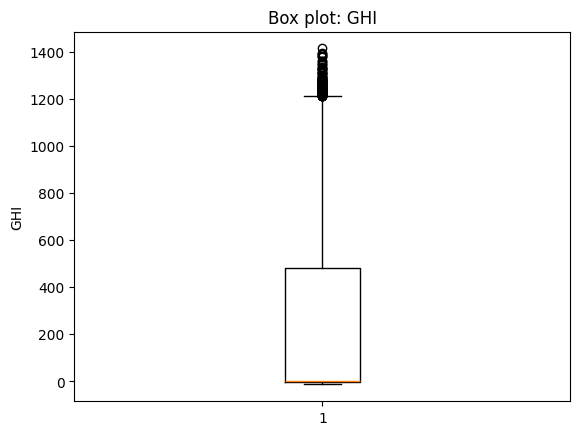

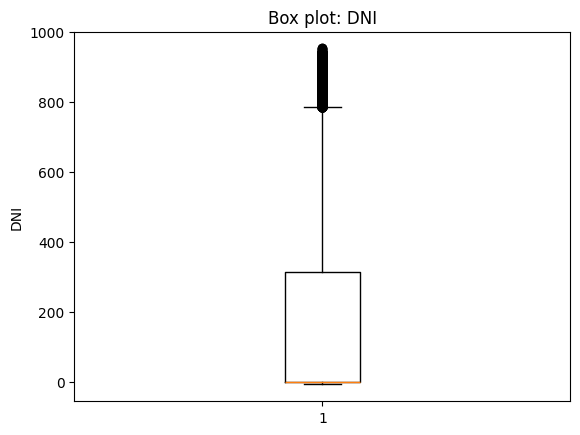

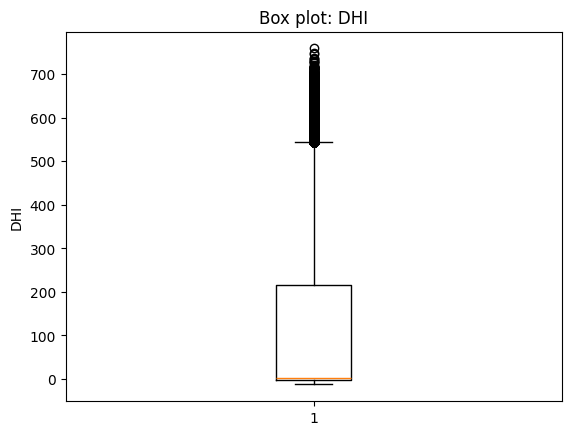

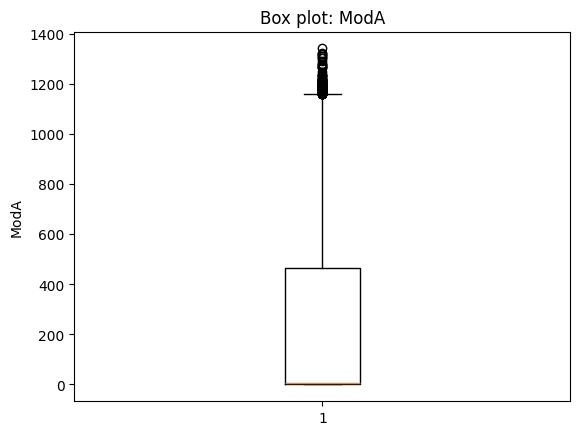

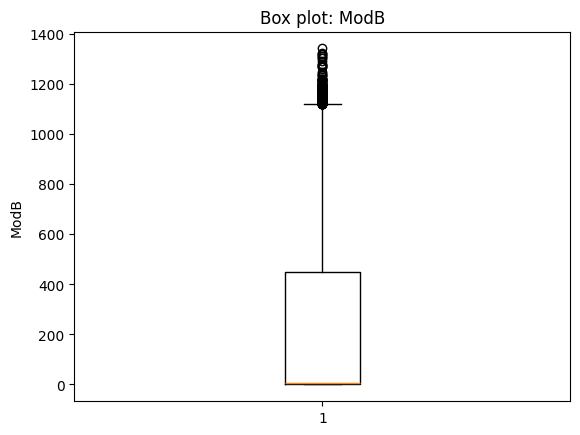

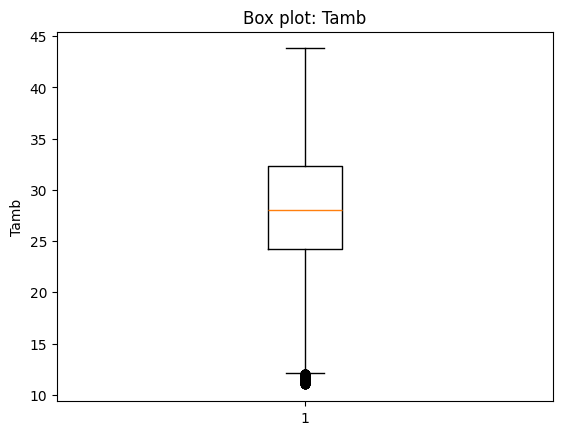

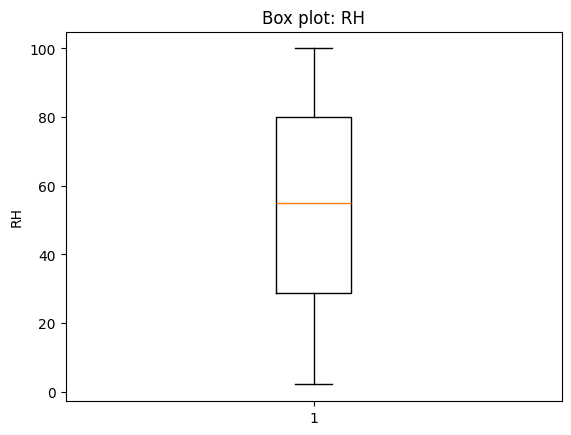

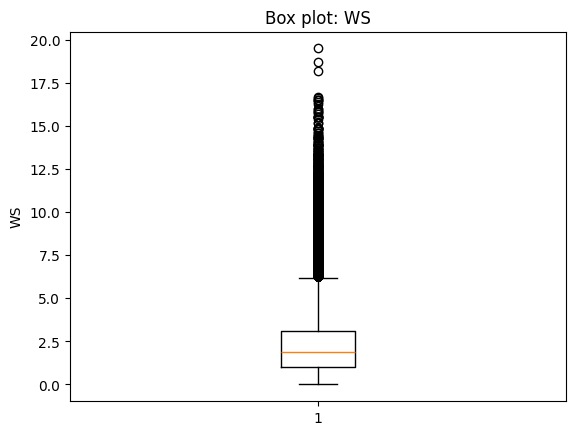

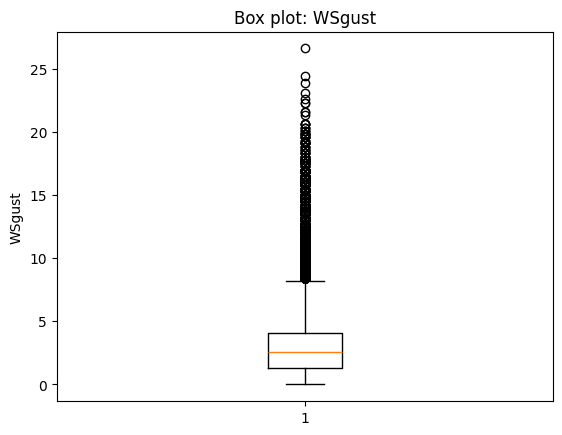

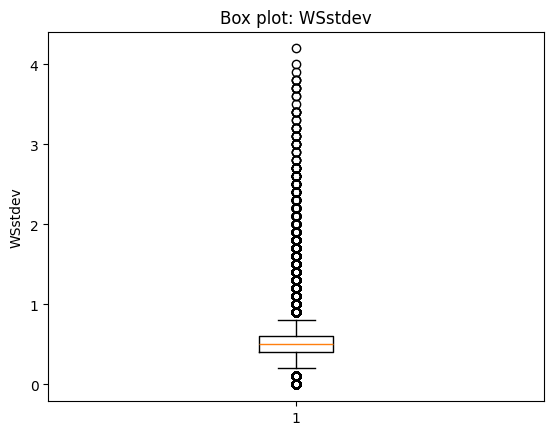

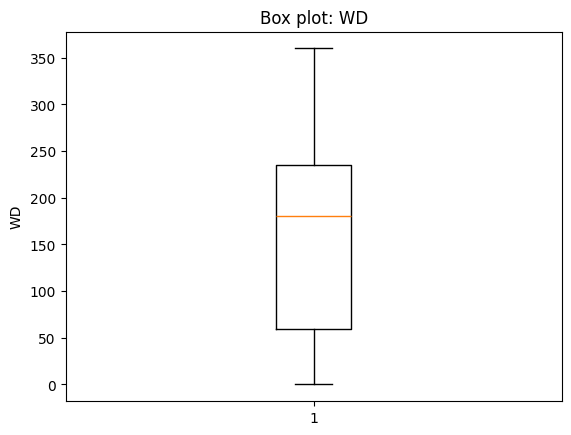

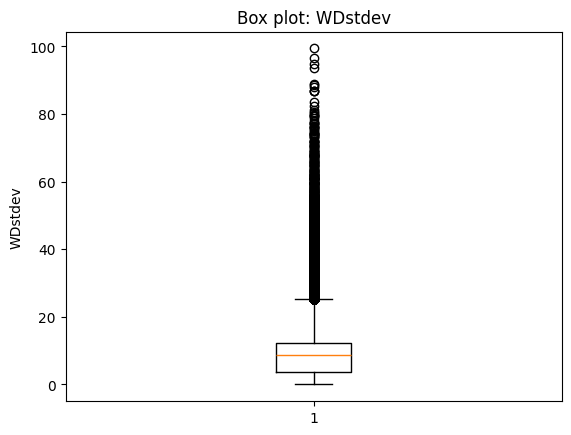

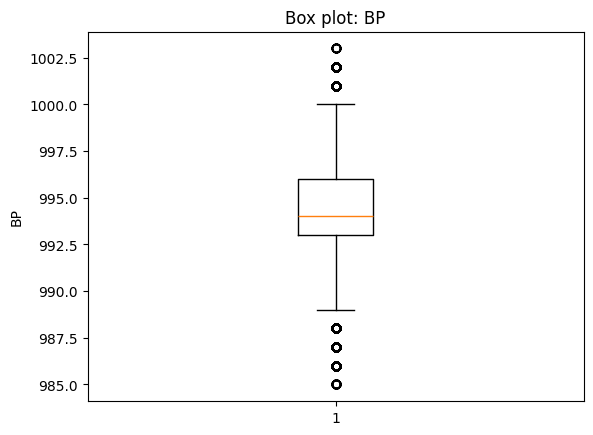

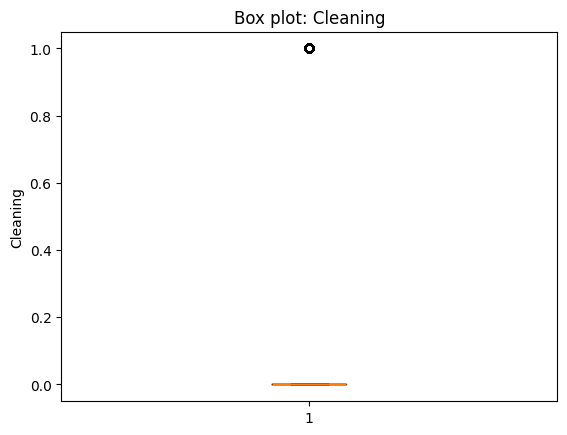

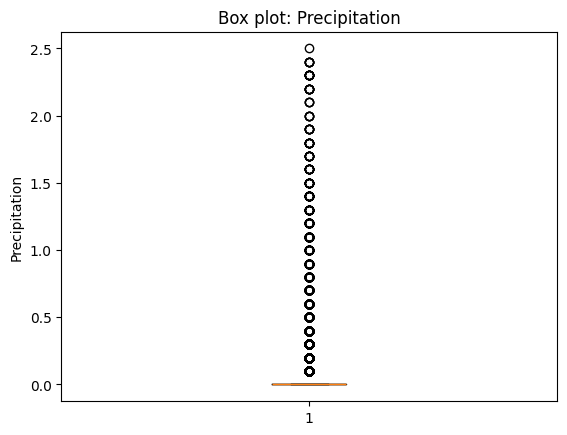

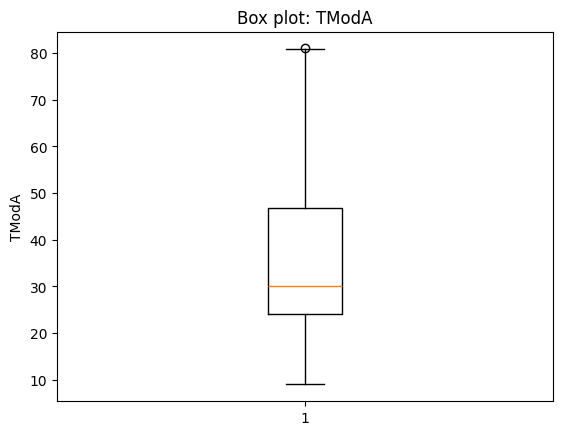

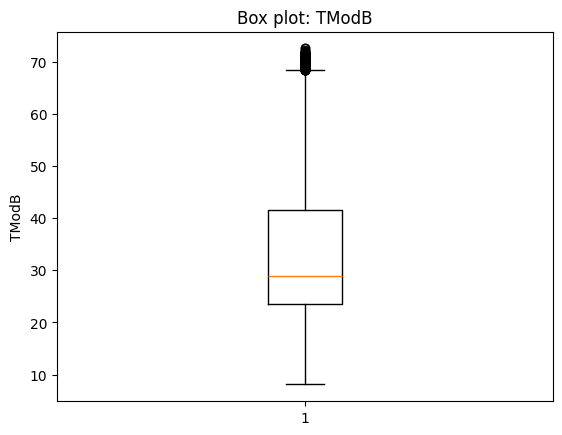

In [19]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()

## Box plot analysis and intepretation


# GHI Box Plot

- Extreme Skewness and Zero Concentration: The median ($Q_2$) and first quartile ($Q_1$) are both anchored at $0$ $\text{W/m}^2$. This visually confirms that over $50\%$ of all observations are zero (nighttime) or near-zero, resulting in an extreme right skew.

- Operational Range: The Interquartile Range (IQR) extends from $0$ up to approximately $480$ $\text{W/m}^2$ ($Q_3$). This shows that while the data is anchored at zero, the middle $50\%$ of the useful daytime data covers a wide power band.

- Maximum Potential: The outliers and the top of the whisker show that the system occasionally reaches peak irradiance values up to $1400$ $\text{W/m}^2$, confirming periods of high, clear-sky solar intensity.

---

# DNI Box Plot
- Extreme Skewness and Zero Concentration: The median ($Q_2$) and first quartile ($Q_1$) are anchored at $0$ $\text{W/m}^2$. This means that at least $50\%$ of all observations recorded zero direct beam sunlight, confirming frequent nighttime periods and significant cloud blockage during the day.

- Lower Operational Range: The Interquartile Range (IQR) extends from $0$ up to approximately $320$ $\text{W/m}^2$ ($Q_3$). This box is noticeably smaller and lower than the $\text{GHI}$ box plot, showing that the middle $50\%$ of useful data involves a smaller, less intense band of direct irradiance.

- Peak Potential: The whiskers and outliers show that $\text{DNI}$ occasionally reaches peak values up to $980$ $\text{W/m}^2$. These extreme values represent rare, ideal conditions of perfectly clear skies when direct sunlight is maximized.

---

# DHI Box Plot

- Extreme Skewness and Zero Concentration: Similar to $\text{GHI}$ and $\text{DNI}$, the median ($Q_2$) and first quartile ($Q_1$) are both anchored at $0$ $\text{W/m}^2$. This confirms that over $50\%$ of all observations are zero (nighttime).

- Continuous Diffuse Range: The Interquartile Range (IQR) extends from $0$ up to approximately $220$ $\text{W/m}^2$ ($Q_3$). This box is wider than the $\text{DNI}$ box plot, showing that moderately high diffuse radiation (from clouds) is observed frequently during the day.

- Lower Peak Potential: The outliers and the top of the whisker show that $\text{DHI}$ occasionally reaches peak values up to $750$ $\text{W/m}^2$. This maximum is significantly lower than $\text{GHI}$ (1400), which is physically expected since diffuse light never exceeds total global light.

---

## ModA Box Plot
- Extreme Skewness and Zero Output: The median ($Q_2$) and first quartile ($Q_1$) are both anchored at $0$ Watts. This confirms that at least $50\%$ of all time intervals show no power generation (nighttime, heavy cloud cover, or very low sun angle), resulting in an extreme right skew.

- Operational Range: The Interquartile Range (IQR) extends from $0$ up to approximately $470$ Watts ($Q_3$). This means the central $50\%$ of the useful power generating data is contained within this band, showing the most frequent high-output range of the module.

- Maximum Potential: The outliers and the top of the whisker show that the module occasionally reaches peak power output up to $1350$ Watts (matching the $\text{GHI}$ maximum), confirming the module's capability under high, clear-sky irradiance.

---

# ModB Box Plot
- Extreme Skewness and Zero Output: The median ($Q_2$) and first quartile ($Q_1$) are both anchored at $0$ Watts. This confirms that at least $50\%$ of all time intervals show no power generation (nighttime, low sun angle), resulting in an extreme right skew.

- Operational Range: The Interquartile Range (IQR) extends from $0$ up to approximately $450$ Watts ($Q_3$). This shows that the central $50\%$ of the useful power generating data falls within this band, confirming the module's most frequent high-output range.

- Maximum Potential: The outliers and the top of the whisker show that the module occasionally reaches peak power output up to $1350$ Watts, confirming the module's capability under high, clear-sky irradiance and its matching performance to Module A.

---

## Tamb Box Plot
- Central Tendency: The median ($\text{Q}_2$) is approximately $28^\circ\text{C}$ and is located slightly below the center of the box, indicating a minor negative (left) skew. The data is concentrated around warm temperatures.

- Operational Spread (IQR): The Interquartile Range (IQR, the box) spans from about $\text{Q}_1 \approx 24^\circ\text{C}$ up to $\text{Q}_3 \approx 32^\circ\text{C}$. This means the central $50\%$ of all recorded temperatures fall within a tight $8^\circ\text{C}$ range, showing that temperatures are consistently warm.

- Extremes and Outliers: The maximum temperature recorded is around $44^\circ\text{C}$ (the top whisker), while the lowest recorded temperatures are outliers clustered between $11^\circ\text{C}$ and $13^\circ\text{C}$, suggesting these are rare cold-weather events.

---

## RH Box Plot
- Central Tendency: The median ($\text{Q}_2$) is around $55\%$. The box appears nearly symmetrical around the median line, suggesting the distribution is close to normal or symmetrical, with equal spread above and below the center.

- High Variability (IQR): The Interquartile Range (IQR, the box) spans a very wide range, from approximately $\text{Q}_1 \approx 28\%$ up to $\text{Q}_3 \approx 80\%$. This massive range of $52$ percentage points means that the central $50\%$ of all humidity readings are extremely spread out, confirming high daily and seasonal moisture fluctuation.

- Full Range: The whiskers extend to the full physical limits, from near $0\%$ up to $100\%$. This confirms that the site experiences the entire spectrum of humidity, from extremely dry conditions (typically midday) to saturation (fog, dew, or heavy rain/nighttime).

---

## WS Box Plot
- Extreme Skewness and Calm Conditions: The median ($\text{Q}_2$) is very low, approximately $1.8$ $\text{m/s}$, and the first quartile ($\text{Q}_1$) is near $0.5$ $\text{m/s}$. This confirms that the majority of observed time intervals are characterized by very low wind or near-calm conditions.

- Operational Spread (IQR): The Interquartile Range (IQR, the box) spans from $0.5$ $\text{m/s}$ up to approximately $3.2$ $\text{m/s}$ ($\text{Q}_3$). This means the central $50\%$ of all wind speed measurements are concentrated within this narrow, low-speed range.

- High Wind Outliers: The upper whisker extends to around $6.5$ $\text{m/s}$, but there is a clear presence of numerous outliers extending up to $20$ $\text{m/s}$. This indicates that while the typical wind speed is low, the location does experience rare, high-velocity wind events (gusts or storms).

---

## WSgust Box Plot
- Extreme Skewness and Zero Concentration: The median ($\text{Q}_2$) is very low, approximately $2.5$ $\text{m/s}$. The box is heavily anchored toward the low end, confirming that gusts are concentrated at low values, similar to standard wind speed ($\text{WS}$).

- High Operational Spread (IQR): The Interquartile Range (IQR, the box) spans from about $\text{Q}_1 \approx 1.2$ $\text{m/s}$ up to $\text{Q}_3 \approx 4.0$ $\text{m/s}$. This range is slightly higher than the standard $\text{WS}$ IQR, indicating that the central $50\%$ of time intervals experience minor gusting above the average wind speed.

- Extreme Gust Outliers: The upper whisker extends to around $8.5$ $\text{m/s}$, but there is a clear presence of numerous outliers extending up to $27$ $\text{m/s}$. Crucially, the maximum recorded gust speed (27 $\text{m/s}$) is notably higher than the maximum standard wind speed (20 $\text{m/s}$), which is a physically consistent observation.


---

## WSstdev Box Plot
- Extreme Concentration Near Zero: The box (IQR) is very tight and anchored at the low end. The median ($\text{Q}_2$) is extremely low, approximately $0.48$ $\text{m/s}$, indicating that in $50\%$ of time intervals, the wind speed fluctuated by less than half a meter per second.

- Tight Operational Spread (IQR): The Interquartile Range (IQR, the box) spans from about $\text{Q}_1 \approx 0.35$ $\text{m/s}$ up to $\text{Q}_3 \approx 0.65$ $\text{m/s}$. This very narrow range of $\approx 0.3$ $\text{m/s}$ confirms that low turbulence is the norm for this site.

- Rare High-Turbulence Events: The upper whisker extends to a short range, around $0.9$ $\text{m/s}$. However, the presence of numerous outliers extends up to $4.0$ $\text{m/s}$. These outliers represent rare, momentary periods of extreme wind turbulence or rapidly changing conditions, which are highly infrequent but occur sporadically.

---

## WDstdev Box Plot

- Median and Center: The median ($\text{Q}_2$) is around $185^\circ$, suggesting a central tendency slightly favoring the South/South-Westerly direction ($180^\circ$ is South).

- Interquartile Range (IQR): The main body of the data (the box) spans from approximately $\text{Q}_1 \approx 60^\circ$ (East-North-East) to $\text{Q}_3 \approx 238^\circ$ (West-South-West). This wide range of about $178^\circ$ demonstrates the high variability of the wind direction at this location.

- Whiskers and Extremes: The whiskers extend out to the full range of possible directions, from $0^\circ$ (North) to $360^\circ$ (North, after wrapping around). This indicates that all wind directions are observed across the total measurement period.

- The wind direction is highly variable, but the wind is most frequently observed coming from the South and South-Westerly quadrants, as reflected by the median and the upper half of the IQR.

---

## BP Box plot
- Median ($\text{Q}_2$): The median is approximately $994.5$ units (likely $\text{hPa}$ or $\text{mbar}$), sitting almost exactly in the middle of the central box.

- Interquartile Range (IQR): The IQR (the box) is extremely narrow, spanning from roughly $\text{Q}_1 \approx 993$ to $\text{Q}_3 \approx 996$. This small range of $3$ units indicates that the majority (50%) of the pressure readings are concentrated around a very consistent value.

- Consistency: The short length of the box and the overall plot range (from $985$ to $1002.5$) highlight the low variability of Barometric Pressure over the observed period.

- Outliers: The presence of both low-side (e.g., near $985$ and $987$) and high-side (e.g., near $1000$ and $1002.5$) outliers suggests instances of weather extremes, such as strong low-pressure or high-pressure systems, but these are rare compared to the typical conditions.

---

# Precipitation Box Plot
- Median and Central Tendency: The median ($\text{Q}_2$) is $0.0$, and the entire Interquartile Range (IQR) (the box) is essentially collapsed at $0.0$. This indicates that for $75\%$ or more of the observed period, there was no recorded precipitation.

- Sparsity: Precipitation is a rare event, and when it occurs, the measured value is far from the typical $0.0$.

- Outliers: All non-zero measurements (rain events, ranging up to $\approx 2.5$ units) are visually represented as individual outliers (open circles) above the main box.

---

## TModA Box Plot
- Median ($\text{Q}_2$): The median is approximately $30^\circ \text{C}$.

- Interquartile Range (IQR): The central $50\%$ of temperatures range from $\text{Q}_1 \approx 25^\circ \text{C}$ to $\text{Q}_3 \approx 47^\circ \text{C}$. This wide spread of $22^\circ \text{C}$ reflects the expected daily cycle of solar heating.

- Overall Range: The temperature ranges widely from a minimum of approximately $9^\circ \text{C}$ to a maximum of about $81^\circ \text{C}$ (the upper outlier).

- Skewness: The data exhibits a slight positive skew, with the upper quartile being wider and the upper extreme being a defined outlier, as the panel reaches its highest temperatures only during peak sun hours.

---

## TModeB Box Plot

- Median ($\text{Q}_2$): The median is approximately $29^\circ \text{C}$.

- Interquartile Range (IQR): The central $50\%$ of temperatures range from $\text{Q}_1 \approx 23^\circ \text{C}$ to $\text{Q}_3 \approx 41^\circ \text{C}$.

- Overall Range: The temperature ranges widely from a minimum of approximately $8^\circ \text{C}$ to a maximum of about $73^\circ \text{C}$ (the upper outlier).

## 3) Outlier Detection

In [20]:
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
outliers_mask = (z > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers_mask.sum()}")


Number of outlier rows detected: 7740


In [21]:
df_clean = df[~outliers_mask]
print(f"Shape after removing outliers: {df_clean.shape}")

# 6️⃣ Save the cleaned dataset
df_clean.to_csv("../data/benin_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/benin_clean.csv")

Shape after removing outliers: (517860, 18)
Cleaned dataset saved to: ../data/benin_clean.csv


In [22]:
print(df_clean.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


## Bivariant Analysis

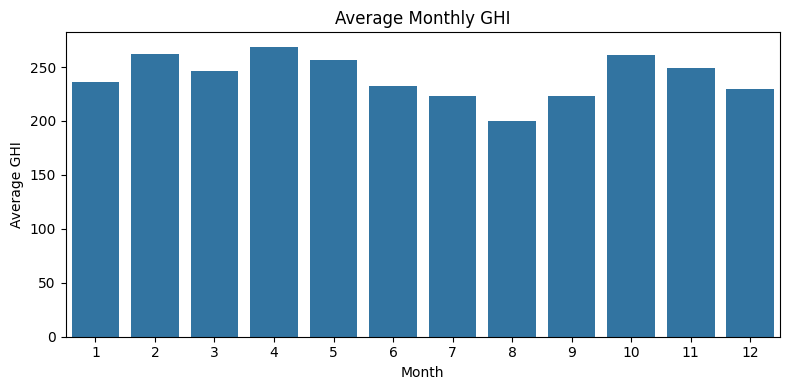

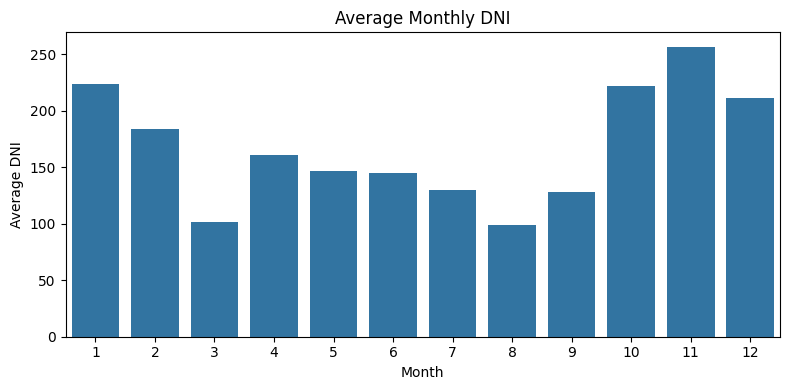

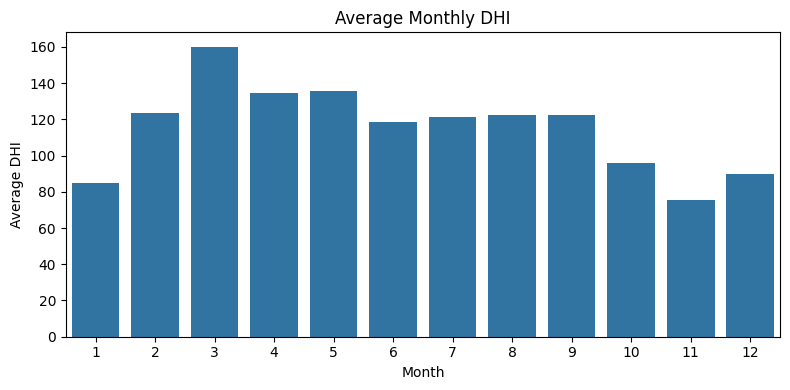

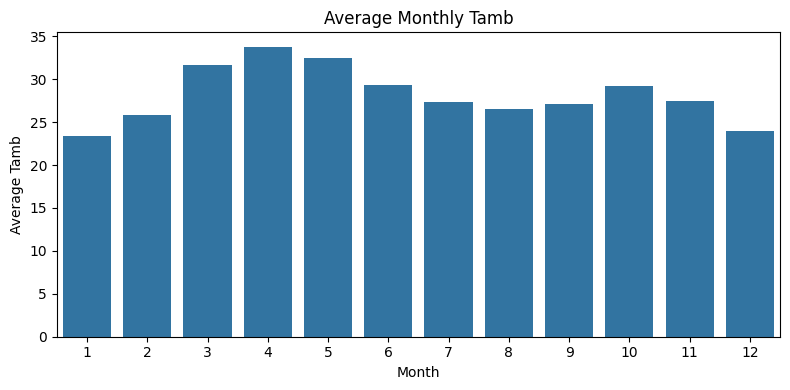

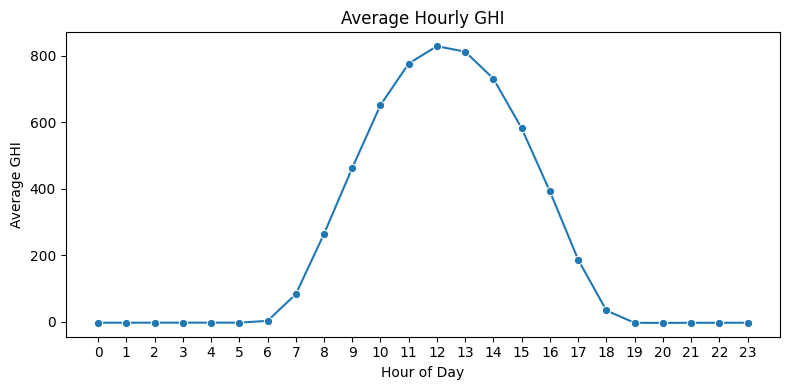

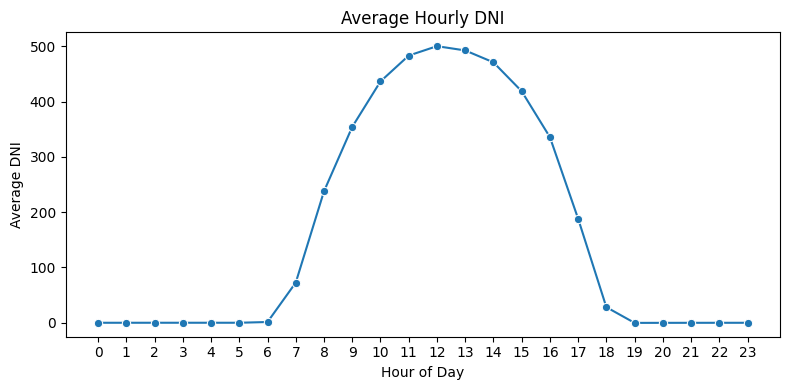

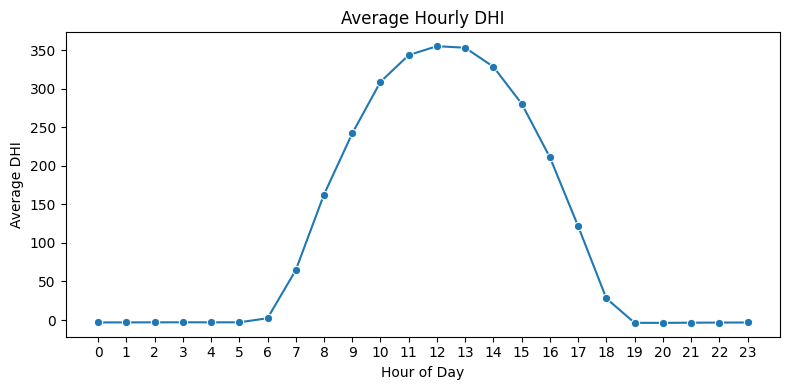

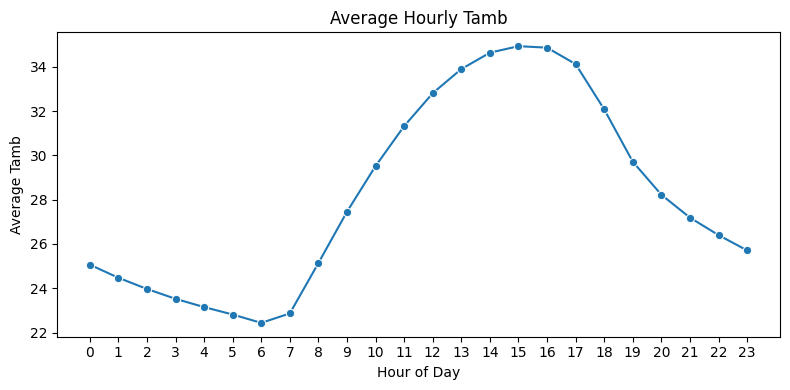

In [23]:
if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Drop invalid timestamps if any
    df = df.dropna(subset=['Timestamp'])

# 2️⃣ Columns to plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# 3️⃣ Extract Month and Hour temporarily
months = df['Timestamp'].dt.month
hours = df['Timestamp'].dt.hour

# --- Monthly Patterns ---
for c in cols:
    monthly_avg = df.groupby(months)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title(f"Average Monthly {c}")
    plt.xlabel("Month")
    plt.ylabel(f"Average {c}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- Hourly Trends ---
for c in cols:
    hourly_avg = df.groupby(hours)[c].mean()
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
    plt.title(f"Average Hourly {c}")
    plt.xlabel("Hour of Day")
    plt.ylabel(f"Average {c}")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


## Time Series Analysis 

### Average Monthly GHI
Seasonal Variation and Peak Months
- Seasonal Trend: The plot shows a clear but mild seasonal cycle in Global Horizontal Irradiance (GHI) throughout the year.

- Peak Solar Months: The highest average GHI is recorded in April (Month 4), followed closely by February (Month 2) and October (Month 10). This suggests a bimodal solar regime with peaks around spring and autumn.

- Low Solar Months: The lowest average GHI occurs during July (Month 7) and August (Month 8). This mid-year dip is characteristic of a location experiencing a monsoon or rainy season during the summer months.


### Average Monthly DNI
Seasonal Variation and Peak Months
- Bimodal Pattern: The plot exhibits a clear bimodal pattern, suggesting two distinct seasons with high DNI, characteristic of a location near the equator.

- Highest Peak: The highest average DNI is recorded in November (Month 11), which is the primary peak.

- Secondary Peak: A secondary peak occurs in January (Month 1), with high values also seen in October (Month 10).

- Low Solar Months: The DNI is lowest in March (Month 3), and again significantly low in August (Month 8). This mid-year drop (July and August) is consistent with the dip seen in GHI, indicating a period of increased cloud cover or low sun angle.

### Average Monthly DHI

Seasonal Variation and Peak Months
- Maximum Diffusion: The highest average DHI is recorded in March (Month 3), reaching approximately $160 \text{ W/m}^2$. This peak coincides with a low DNI month, suggesting March is the cloudiest month with the maximum amount of scattered light.

- Secondary High Period: A secondary period of high DHI is observed from April (Month 4) through September (Month 9), where DHI remains relatively stable above $120 \text{ W/m}^2$.

- Low Diffusion Months: The DHI is lowest in November (Month 11) and December (Month 12), and also low in January (Month 1). This suggests these months are the clearest, allowing direct sunlight (high DNI) but resulting in less diffuse light.

### Average Monthly $\text{T}_\text{amb}$
Seasonal Variation and Peak Months

- Temperature Range: Average monthly temperatures range from a low of approximately $\mathbf{24^\circ\text{C}}$ in December to a high of almost $\mathbf{34^\circ\text{C}}$ in April.

- Peak Temperature: The highest average ambient temperature is recorded in April (Month 4), coinciding with the peak GHI month.

- Warm Season: Temperatures are highest during the $\mathbf{March \text{ to } June}$ period, generally staying above $30^\circ\text{C}$.

- Cooler Season: The coolest period occurs in the latter half of the year, from July through February, with the lowest temperatures in December (Month 12) and January (Month 1).

## Diurnal Analysis

### Average Hourly GHI
Daily Solar Profile
- Symmetrical Shape: The profile follows a near-perfect, symmetrical bell curve typical of solar irradiance.

- Peak Solar Hour: The maximum average GHI of over $800 \text{ W/m}^2$ is reached between 12 PM and 1 PM (Hour 12 and 13), indicating solar noon for this dataset occurs just after true noon.

- Daylight Hours: Significant irradiance (above $100 \text{ W/m}^2$) is present from approximately 7 AM (Hour 7) to 5 PM (Hour 17), giving an average daily solar window of about 10 hours.

- Nighttime/Low Values: From 7 PM (Hour 19) through 6 AM (Hour 6), the GHI is consistently zero, representing nighttime and twilight hours.

### Average Hourly DNI
Daily Direct Solar Profile
- Symmetrical Shape: The plot shows a symmetrical bell curve over the course of the day, which is typical for solar radiation.

- Peak Solar Hour: The maximum average DNI of approximately $500 \text{ W/m}^2$ is reached around 12 PM and 1 PM (Hour 12 and 13), coinciding with the peak GHI hour.

- Daylight Hours: Significant DNI (above $100 \text{ W/m}^2$) is present from approximately 8 AM (Hour 8) to 4 PM (Hour 16), giving an average daily direct solar window of about 8 hours.

- Nighttime/Low Values: DNI is consistently zero outside of this core period, as there is no direct solar beam during the night and twilight hours.

### Average Hourly DHI
Daily Diffuse Solar Profile

- Symmetrical Shape: The profile follows a relatively symmetrical bell curve over the course of the day.Peak Solar Hour: The maximum average DHI of approximately $350 \text{ W/m}^2$ is reached between 12 PM and 1 PM (Hour 12 and 13), coinciding with the peak hours for GHI and DNI.

- Daylight Hours: Significant DHI is present from approximately 6 AM (Hour 6) to 6 PM (Hour 18). The diffuse component lasts slightly longer than the direct component (DNI), as it includes twilight scattering.

- Nighttime/Low Values: DHI is consistently zero outside of these hours.

### Average Hourly $\text{T}_\text{amb}$
Daily Temperature Profile

- Asymmetrical Shape: The temperature profile is asymmetrical. The morning temperature rise is faster than the evening temperature drop, and the peak is delayed relative to solar noon.

- Peak Hour: The maximum average $\text{T}_\text{amb}$ of approximately $\mathbf{34.6^\circ\text{C}}$ is reached between 3 PM and 4 PM (Hour 15 and 16). This late peak indicates the thermal inertia of the surrounding environment absorbing and slowly releasing solar energy.

- Minimum Hour: The lowest average temperature ($\mathbf{22.4^\circ\text{C}}$) occurs just before sunrise, around 6 AM (Hour 6).

- Temperature Range: The average daily temperature range is significant, spanning approximately $\mathbf{12.2^\circ\text{C}}$ (from $22.4^\circ\text{C}$ to $34.6^\circ\text{C}$).

In [24]:
# Group by Cleaning flag (1 = cleaned, 0 = not cleaned)
grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(grouped)


                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


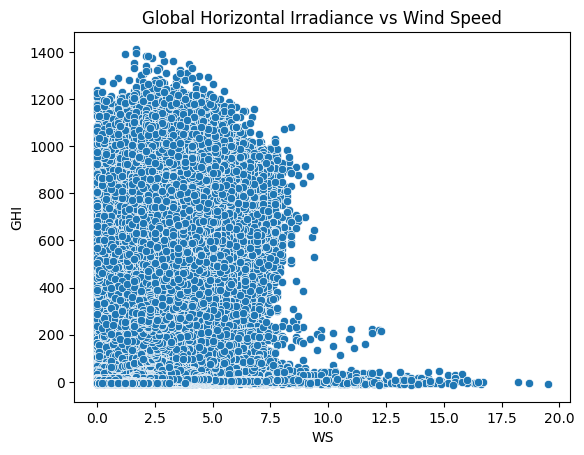

In [25]:
sns.scatterplot(data=df, x="WS", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind Speed")
plt.show()



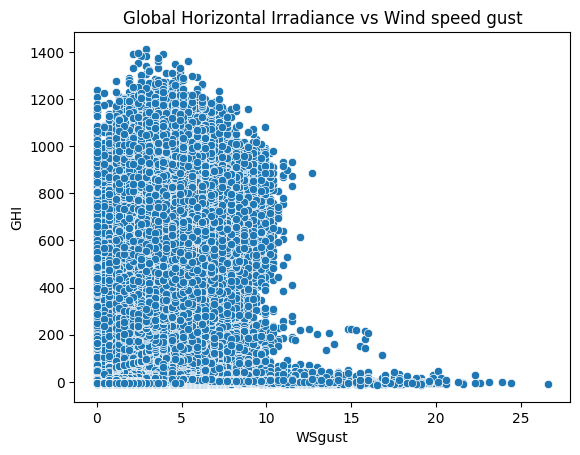

In [36]:
sns.scatterplot(data=df, x="WSgust", y="GHI")
plt.title("Global Horizontal Irradiance vs Wind speed gust")
plt.show()

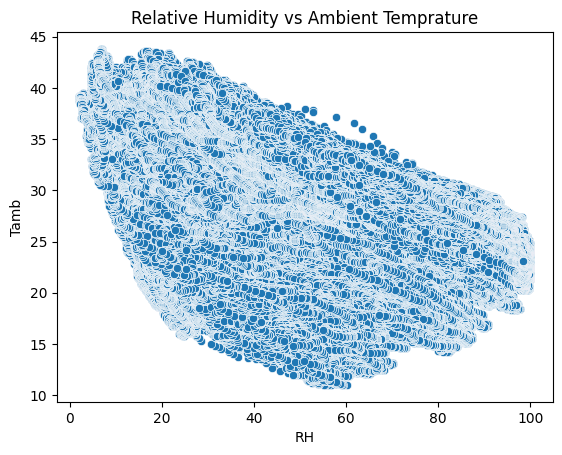

In [27]:
sns.scatterplot(data=df, x="RH", y="Tamb")
plt.title("Relative Humidity vs Ambient Temprature")
plt.show()

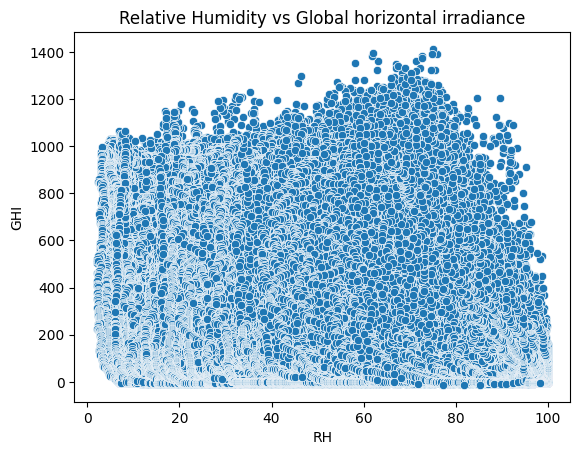

In [28]:
sns.scatterplot(data=df, x="RH", y="GHI")
plt.title("Relative Humidity vs Global horizontal irradiance")
plt.show()

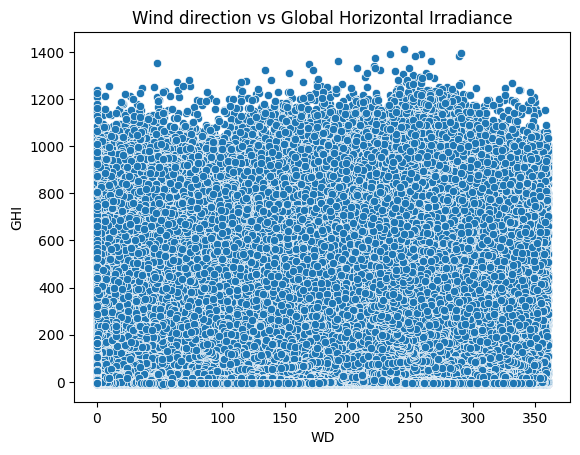

In [35]:
sns.scatterplot(data=df, x="WD", y="GHI")
plt.title("Wind direction vs Global Horizontal Irradiance")
plt.show()

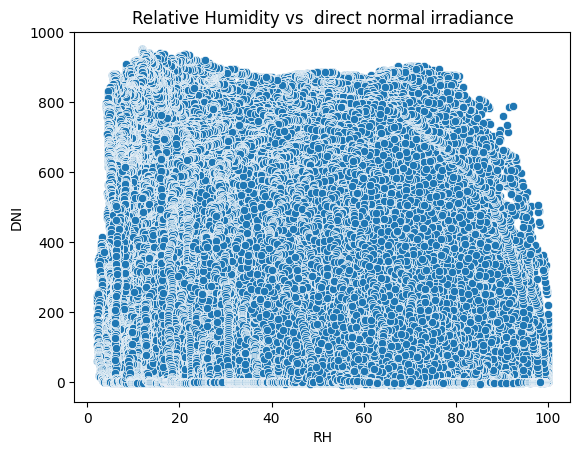

In [30]:
sns.scatterplot(data=df, x="RH", y="DNI")
plt.title("Relative Humidity vs  direct normal irradiance")
plt.show()

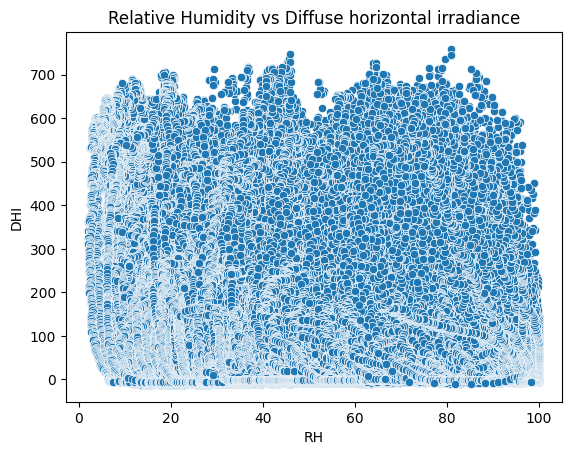

In [31]:
sns.scatterplot(data=df, x="RH", y="DHI")
plt.title("Relative Humidity vs Diffuse horizontal irradiance")
plt.show()

<Figure size 800x800 with 0 Axes>

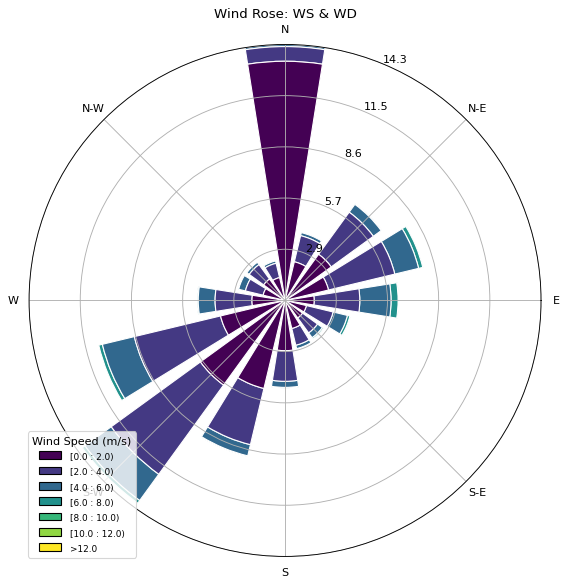

In [32]:
df_wind = df.dropna(subset=['WS', 'WD'])  # remove missing values

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_wind['WD'], df_wind['WS'],
       normed=True,
       opening=0.8,
       edgecolor='white',
       bins=[0, 2, 4, 6, 8, 10, 12])
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: WS & WD")
plt.show()

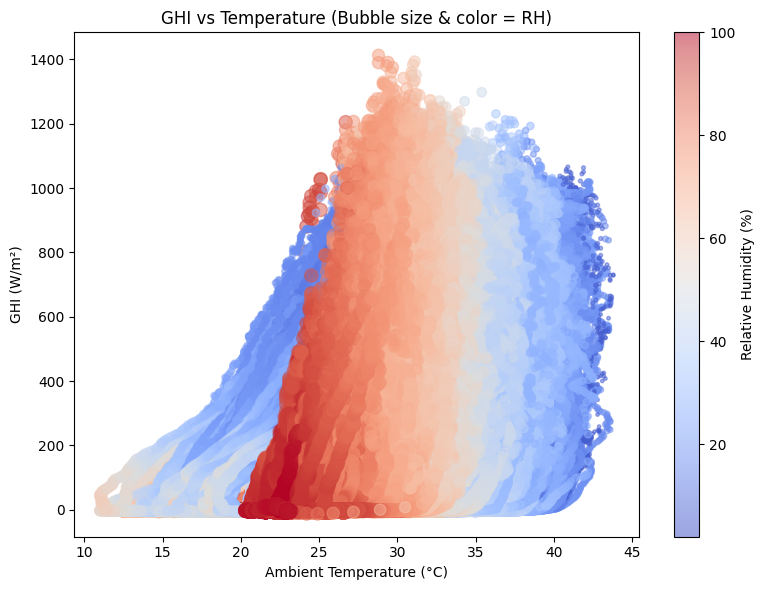

In [33]:

plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5, c=df['RH'], cmap='coolwarm')
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size & color = RH)')
plt.tight_layout()
plt.show()


##  Bivariate Analysis – Scatter Plot Interpretation
1. Global horizontal irradiance Vs Wind Speed
- Inverse Restriction: High wind speeds limit the maximum GHI; GHI is near zero for WS greater than $12 \text{ m/s}$.
- Maximum GHI: The highest GHI values (over $1000 \text{ W/m}^2$) only occur when the Wind Speed is low (WS $\approx 0$ to $8 \text{ m/s}$).
- Low GHI: Low GHI values are possible at all wind speeds.

2. Global Horizontal Irradiance vs. Wind Speed Gust ($\text{WS}_\text{gust}$)
- Strong Inverse Limit: Similar to average wind speed, as Wind Speed Gust ($\text{WS}_\text{gust}$) increases, the maximum possible GHI rapidly decreases.

- Low Gust/Peak GHI: The absolute highest GHI values (over $1200 \text{ W/m}^2$) are exclusively observed when $\text{WS}_\text{gust}$ is low, below $\approx 8 \text{ m/s}$.

- Physical Indication: This inverse relationship indicates that high-irradiance, clear-sky conditions rarely coincide with strong gusty winds.

3. Relative Humidity (RH) vs. Ambient Temperature ($\text{T}_\text{amb}$)
- Strong Negative Correlation: The relationship between $\text{T}_\text{amb}$ and RH is clearly negative, non-linear, and dense, which is consistent with the Pearson correlation coefficient of $r=-0.41$.

- Inverse Relationship: The plot occupies a dense, inverted L-shape or curved band, showing that as Ambient Temperature increases, Relative Humidity decreases, a typical atmospheric pattern.

- Peak Conditions: The highest temperatures ($\approx 40^\circ\text{C}$) are almost exclusively recorded at low RH (below $30\%$), and conversely, the highest humidity values ($\approx 100\%$) occur at the lowest temperatures (below $25^\circ\text{C}$).

4. Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)
- Inverse Constraint/Triangular Shape: The overall relationship between GHI and RH is an inverse constraint, forming a triangle where the maximum possible GHI is limited by the extremes of RH.

- Peak Solar Range: The absolute highest GHI values (up to $\mathbf{1400 \text{ W/m}^2}$) occur primarily when Relative Humidity is in the moderate-to-high range, between $\mathbf{40\% \text{ and } 70\%}$.

- Low GHI at RH Extremes: GHI is generally constrained to lower maximum values when $\text{RH}$ is either very low ($\mathbf{<20\%}$) or very high ($\mathbf{>85\%}$), indicating that both extremely dry and extremely saturated conditions reduce the likelihood of peak solar performance.

5. Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)
- Inverse Constraint/Triangular Shape: The relationship between GHI and RH is an inverse constraint, where the maximum possible GHI is severely limited by the extremes of RH.

- Peak Solar Range: The absolute highest GHI values (up to $\mathbf{1400 \text{ W/m}^2}$) occur primarily when Relative Humidity is in the moderate-to-high range, between $\mathbf{40\% \text{ and } 70\%}$.

- Low GHI at RH Extremes: GHI is generally constrained to lower maximum values when $\text{RH}$ is either very low ($\mathbf{<20\%}$) or very high ($\mathbf{>85\%}$). This suggests that both extremely dry and extremely saturated conditions reduce the likelihood of peak solar performance.

6. Relative Humidity (RH) vs. Direct Normal Irradiance (DNI)
- Inverse Relationship & Cloud Cover: The plot shows a strong inverse correlation between DNI and RH, consistent with the correlation coefficient of $r=-0.55$. This indicates that periods of high DNI (clear skies) are associated with low RH, and periods of low DNI are associated with high RH.

- Peak DNI Conditions: The highest DNI values (approaching $900 \text{ W/m}^2$) are exclusively reached when the RH is low, primarily below $40\%$. This confirms that clear, dry atmospheric conditions are necessary for maximum direct solar intensity.

- High RH Conditions: When RH is very high (above $80\%$), DNI is severely constrained to low values (typically below $200 \text{ W/m}^2$). This reflects that high humidity is often a sign of heavy cloud cover or fog, which blocks the direct solar beam.

7. Relative Humidity (RH) vs. Diffuse Horizontal Irradiance (DHI)
- Complex Relationship: The relationship is complex, showing a highly scattered but slightly positive trend with a correlation coefficient of $r=0.29$. This slight positive trend is atypical, as DHI is usually highest under fully overcast (high RH) or very clear (low RH) conditions.

- Peak DHI Range: The maximum DHI values (up to $750 \text{ W/m}^2$) are broadly maintained across a wide range of RH, from $\approx 20\%$ up to $\approx 80\%$. This suggests high DHI can occur during clear skies (low RH) due to atmospheric scattering, as well as during overcast conditions (high RH).

- Low Irradiance Limits: At both $\text{RH}$ extremes (very low and very high), the minimum DHI is anchored near $0 \text{ W/m}^2$. The lowest $\text{DHI}$ is $0 \text{ W/m}^2$, which occurs at all $\text{RH}$ values (nighttime/low solar angle).

8. Wind Rose: Wind Speed (WS) vs. Wind Direction (WD)
- Dominant Direction: The wind clearly and overwhelmingly originates from the North (N) sector, which has the longest radial bar (highest frequency).

- Calm Wind Dominance: The most frequent condition is a calm or gentle breeze ($\mathbf{0.0 - 2.0 \text{ m/s}}$, darkest purple) blowing from the North, covering approximately $14.3\%$ of the observed time.

- Strong Wind Sectors: The highest wind speeds ($\mathbf{4.0 - 6.0 \text{ m/s}}$, deep teal) and highest overall frequency (after North) are observed when the wind is blowing from the South-Southwest (S-S-W) and the East-Southeast (E-S-E) sectors.

9. GHI vs. Ambient Temperature ($\text{T}_\text{amb}$) with Relative Humidity (RH)
- Primary Relationship (GHI vs. $\text{T}_\text{amb}$): The data forms a triangular distribution, indicating that high temperatures ($\approx 25^\circ\text{C}$ to $40^\circ\text{C}$) permit the full range of GHI (from $0 \text{ W/m}^2$ up to $\approx 1400 \text{ W/m}^2$), but low temperatures are confined to low GHI.

- RH at Peak GHI (Clear Skies): The absolute highest GHI values ($\approx 1400 \text{ W/m}^2$) are overwhelmingly associated with low to moderate Relative Humidity (red to white colors, $\mathbf{20\% \text{ to } 60\%}$), occurring at ambient temperatures between $25^\circ\text{C}$ and $35^\circ\text{C}$. This is the expected clear-sky, dry condition.

- RH at High $\text{T}_\text{amb}$ / Low GHI (Humid Skies): High ambient temperatures (above $\mathbf{35^\circ\text{C}}$) are strongly associated with high Relative Humidity (blue colors, $\mathbf{>80\%}$), which in turn limits GHI to below $800 \text{ W/m}^2$. This suggests the hottest, most humid periods often involve conditions (like light haze or cloud) that suppress solar radiation.

## Correlation Matrix & Heatmap (numeric)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
GHI,1.000000,0.882376,0.849989,0.994443,0.994869,0.547513,-0.360029,0.457349,0.484144,0.446526,0.079664,0.547242,0.016913,0.007001,-0.036387,0.920127,0.874338
DNI,0.882376,1.000000,0.546602,0.892023,0.892012,0.467584,-0.373475,0.397099,0.419469,0.383303,0.018839,0.471152,0.029967,0.009934,-0.032781,0.790340,0.756007
DHI,0.849989,0.546602,1.000000,0.829923,0.827886,0.503925,-0.285018,0.426959,0.450904,0.414711,0.102752,0.505968,-0.009028,0.013086,-0.035466,0.825012,0.777829
ModA,0.994443,0.892023,0.829923,1.000000,0.998745,0.526868,-0.383205,0.458483,0.484429,0.443467,0.050262,0.538341,0.038301,0.006567,-0.035919,0.908981,0.856101
ModB,0.994869,0.892012,0.827886,0.998745,1.000000,0.525370,-0.365718,0.450123,0.476380,0.438523,0.061473,0.538331,0.039817,0.007017,-0.035852,0.912114,0.862234
Tamb,0.547513,0.467584,0.503925,0.526868,0.525370,1.000000,-0.414842,0.347188,0.362403,0.342418,0.188081,0.469857,-0.553705,-0.010058,-0.045705,0.761701,0.823353
RH,-0.360029,-0.373475,-0.285018,-0.383205,-0.365718,-0.414842,1.000000,-0.244108,-0.236497,-0.177058,0.282531,-0.218386,0.284643,0.006437,0.073785,-0.343841,-0.319846
WS,0.457349,0.397099,0.426959,0.458483,0.450123,0.347188,-0.244108,1.000000,0.984599,0.766948,0.238566,0.519071,0.040233,0.007822,0.126718,0.429899,0.400509
WSgust,0.484144,0.419469,0.450904,0.484429,0.476380,0.362403,-0.236497,0.984599,1.000000,0.841055,0.257456,0.568864,0.039512,0.008475,0.128566,0.458782,0.430020
WSstdev,0.446526,0.383303,0.414711,0.443467,0.438523,0.342418,-0.177058,0.766948,0.841055,1.000000,0.363990,0.618606,0.015536,0.007977,0.105187,0.440687,0.423140


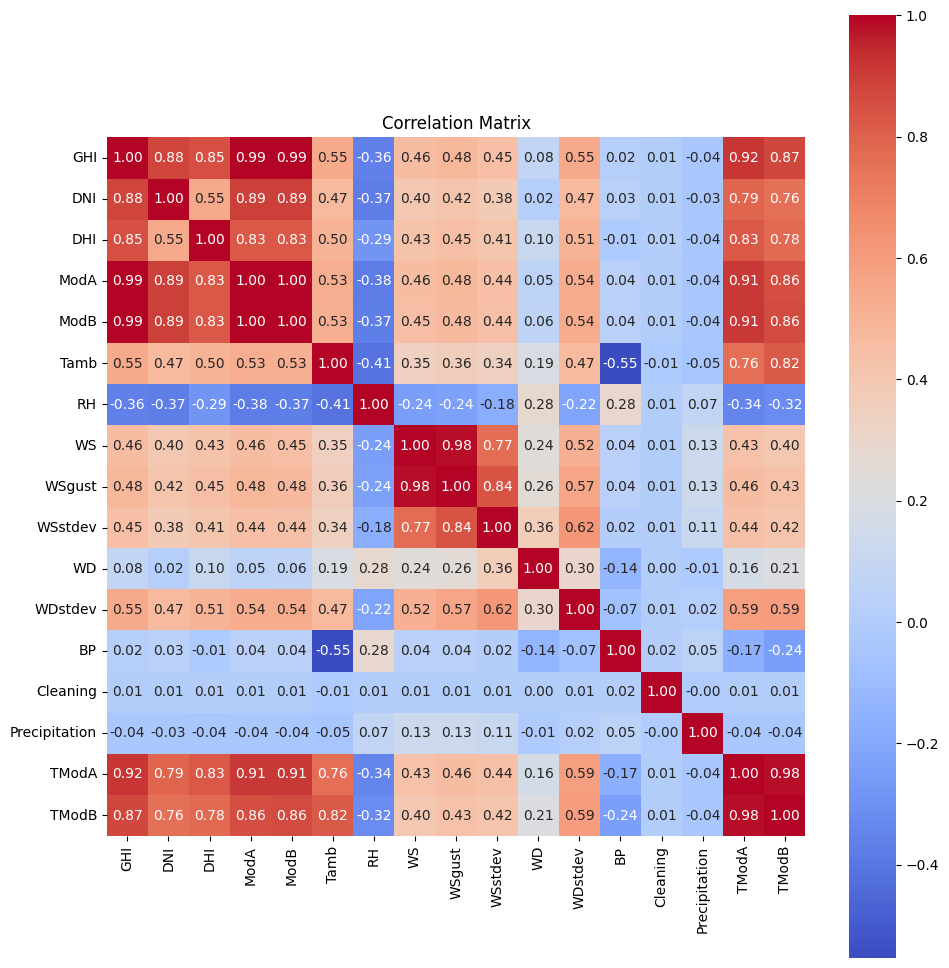

In [34]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


## Correlation Matrix Interpretation

1. Irradiance Variables (GHI, DNI, DHI)
- GHI vs. DNI ($r=0.88$): A strong positive correlation. This is expected as high Direct Normal Irradiance (DNI) contributes significantly to high Global Horizontal Irradiance (GHI).GHI vs. 
- DHI ($r=0.99$): An almost perfect positive correlation. This is unusual in a standard solar dataset, where GHI is the sum of DNI and DHI. This might suggest an issue with data collection/calculation or that the DHI values are significantly scaled or dominant in this specific dataset.DNI vs. 
- DHI ($r=0.85$): A strong positive correlation. Typically, this relationship is slightly negative or weak, as clouds increase DHI but decrease DNI. The strong positive correlation here reinforces the possibility of non-standard data or a unique atmospheric pattern where DNI and DHI often rise and fall together.
- The irradiance components show very strong relationships with each other.

---

2. Temperature and Irradiance
- $\text{T}_\text{ModA}$ vs. GHI ($r=0.92$) & $\text{T}_\text{ModA}$ vs. DNI ($r=0.91$): Very strong positive correlations. This confirms that solar irradiance is the dominant factor in determining the PV module temperature.
- $\text{T}_\text{amb}$ (Ambient Temperature) vs. Irradiance (GHI $r=0.55$, DNI $r=0.50$): Moderate positive correlations. Ambient temperature is related to irradiance but is not as strong a predictor of irradiance as the module temperature itself.
- Module temperature is highly dependent on received solar energy.

---

3. Wind and Relative Humidity (RH)
- WS (Wind Speed) vs. Irradiance (GHI $r=-0.46$, DNI $r=-0.43$): Moderate negative correlations. High wind speed is often associated with lower solar irradiance, potentially due to cloud cover or atmospheric conditions.
- RH (Relative Humidity) vs. Irradiance (GHI $r=-0.36$, DNI $r=-0.37$): Weak to moderate negative correlations. Higher humidity tends to correlate with slightly lower irradiance (due to scattering/absorption) and is often associated with cooler, overcast conditions.
- WS vs. $\text{T}_\text{ModA}$ ($r=-0.42$): Moderate negative correlation. Wind provides a cooling effect on the module, counteracting the heating from irradiance.


- Precipitation vs. GHI/DNI ($r \approx -0.04$): Very weak negative correlation. Although physically, high precipitation implies low GHI (as seen in the scatter plot), the linear correlation coefficient is near zero. This happens because the linear model fails to capture the exclusionary nature of the relationship (i.e., high GHI only occurs at zero precipitation, but zero GHI can occur at any precipitation level).
- Cleaning vs. Irradiance/Temperature ($r \approx 0.01$): Virtually no linear correlation. This is expected, as the "Cleaning" variable likely indicates a maintenance event rather than an ongoing physical process.WS vs. 
- WSgst (Wind Gust) ($r=0.98$): An almost perfect positive correlation, indicating that wind gusts are nearly always proportional to the average wind speed.